In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [52]:
urrent = np.arange(0,7.04,0.02)
field = 1.61893 + 26.1952 * current # length of field is number of files

directory = os.path.join("HRRYIG_PY","HRRYIG_SPS_PY")

In [53]:
def read_s_params(directory):
    

    files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    s_parameters = dict()

    for file in files:
        data = pd.read_csv(os.path.join(directory, file), header=0, index_col=0)
        for key in data.keys():
            if key not in s_parameters:
                s_parameters[key] = np.empty((len(files), len(data)))
            s_parameters[key][files.index(file), :] = data[key].to_numpy()

    return s_parameters

In [54]:
def s_param_plot(directory=directory, norm=False):

    s_parameters = read_s_params(directory)

    fig, axs = plt.subplots(2,2, figsize=(10, 10),sharey=True)
    keys = ['S11', 'S21', 'S12', 'S22']
    for i, ax in enumerate(axs.flat):
        plot_data = s_parameters[f'{keys[i]}_Real']+1j*s_parameters[f'{keys[i]}_Imaginary']
        if norm:
            plot_data -= plot_data[0,:]  # Subtract the first row for normalization
        ax.pcolormesh(field,data.index*1e-9,np.abs(plot_data).T)
        if i % 2 == 0:
            ax.set_ylabel("Freq (GHz)")
        ax.set_xlabel("Field (mT)")
        ax.set_title(f"{keys[i]} Magnitude")
        ax.set_ylim(2.5,7.5)
    plt.tight_layout()
    # plt.colorbar()
    if not norm:
        plt.savefig(directory + "_raw")
    else:
        filename = directory + "_normalised"
        plt.savefig(filename)

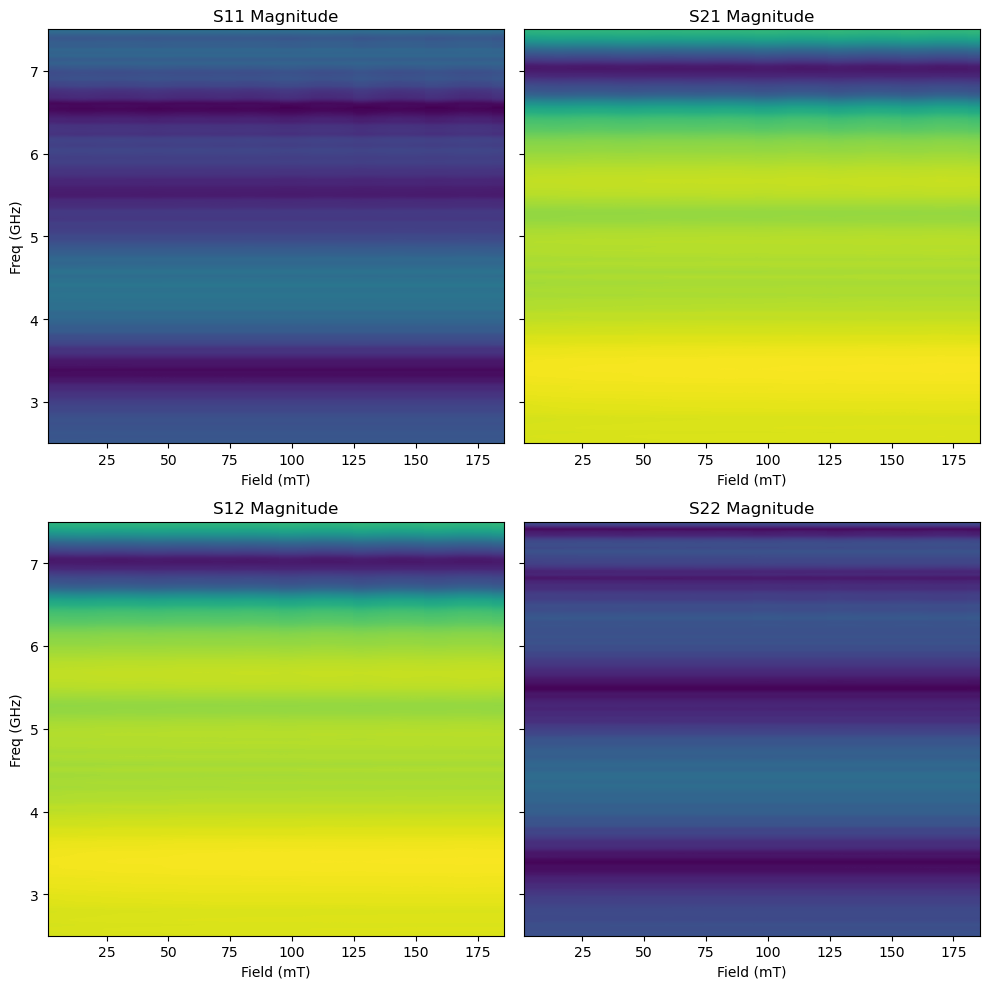

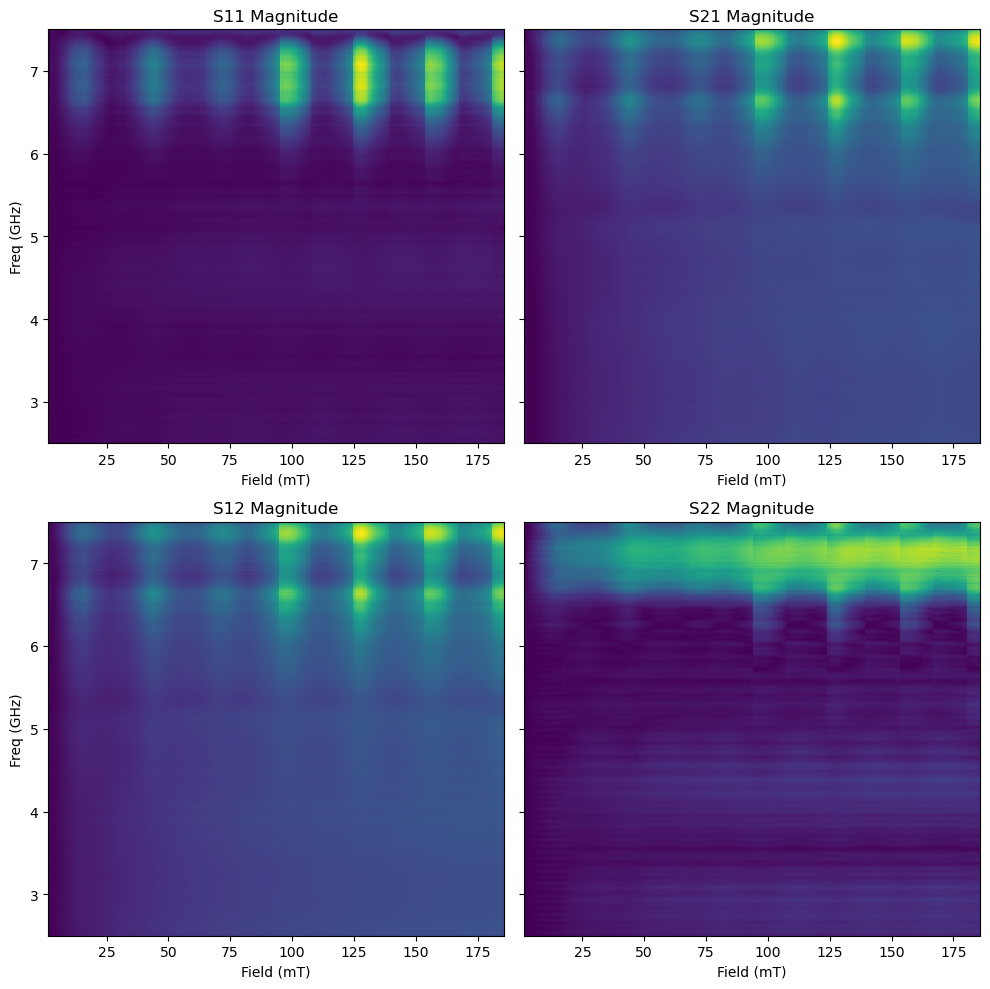

In [55]:
s_param_plot()
s_param_plot(norm=True)

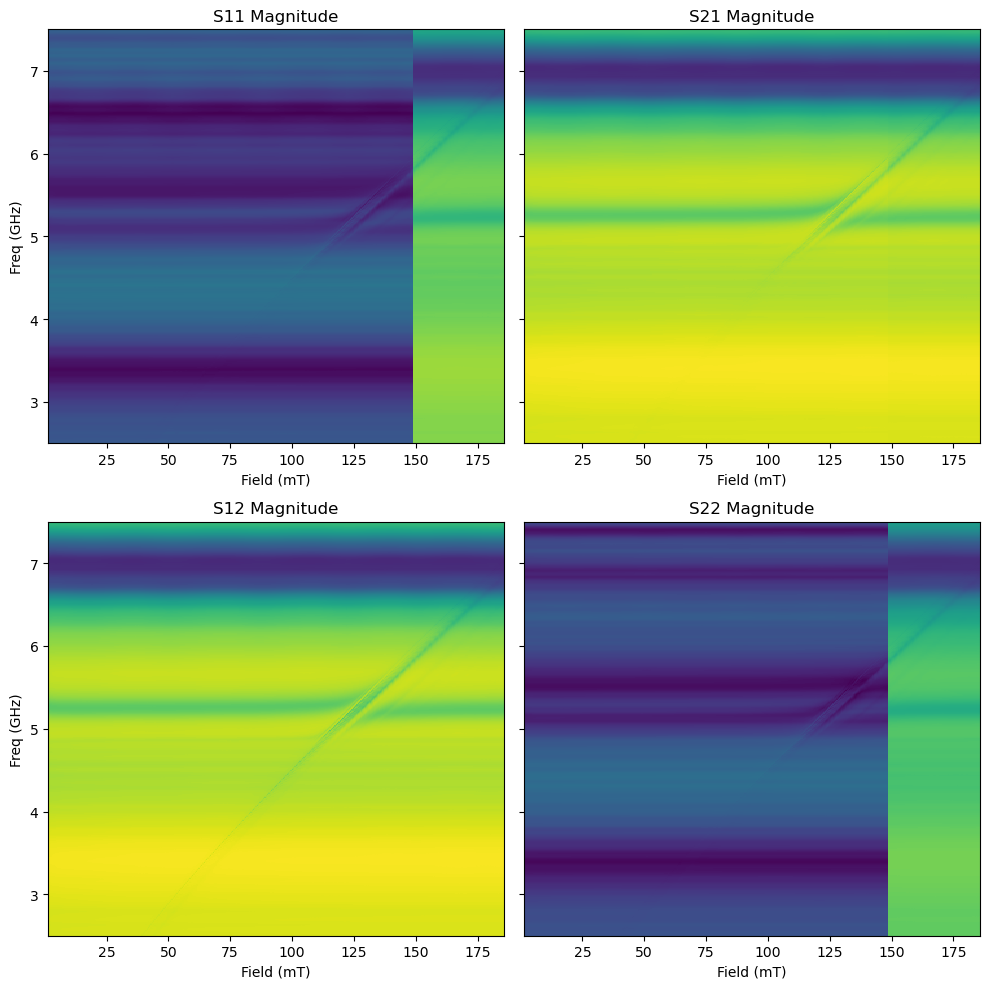

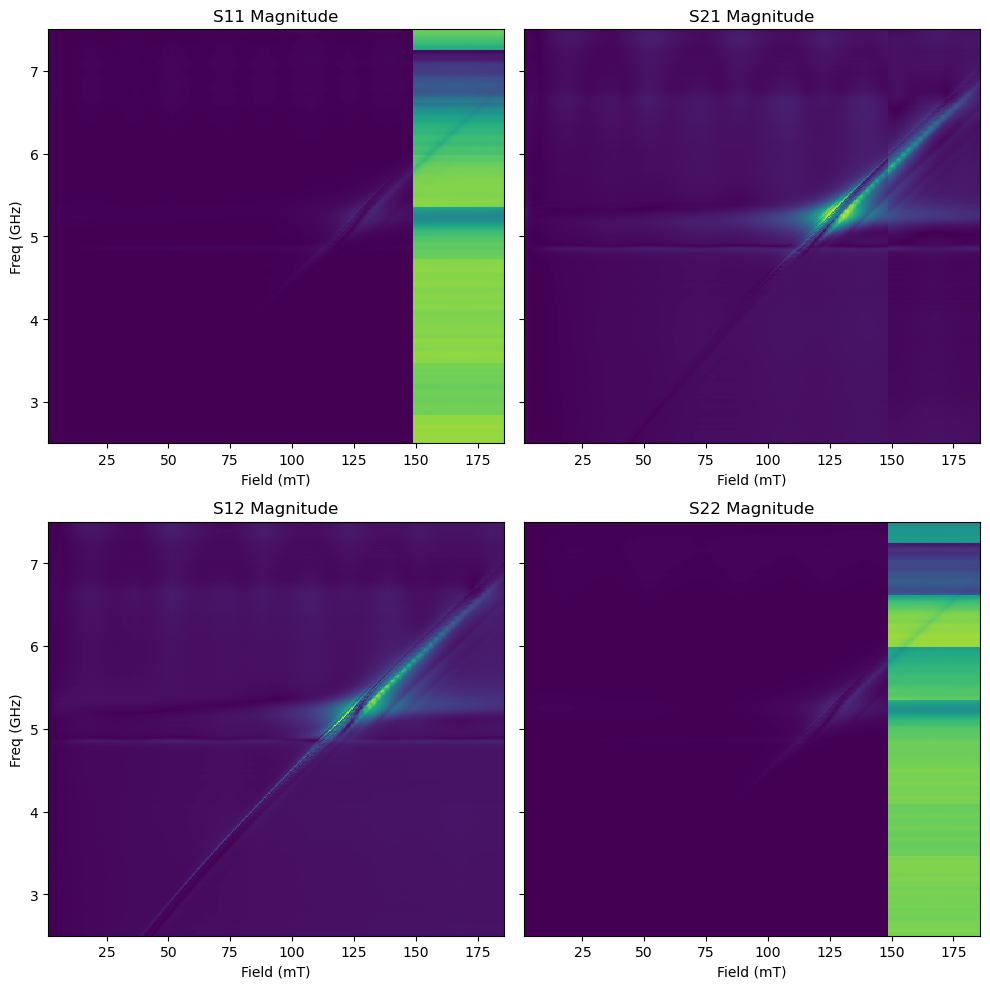

In [56]:
s_param_plot(os.path.join("HRRYIG_PY","HRRYIG_PY"))
s_param_plot(os.path.join("HRRYIG_PY","HRRYIG_PY"),norm=True)

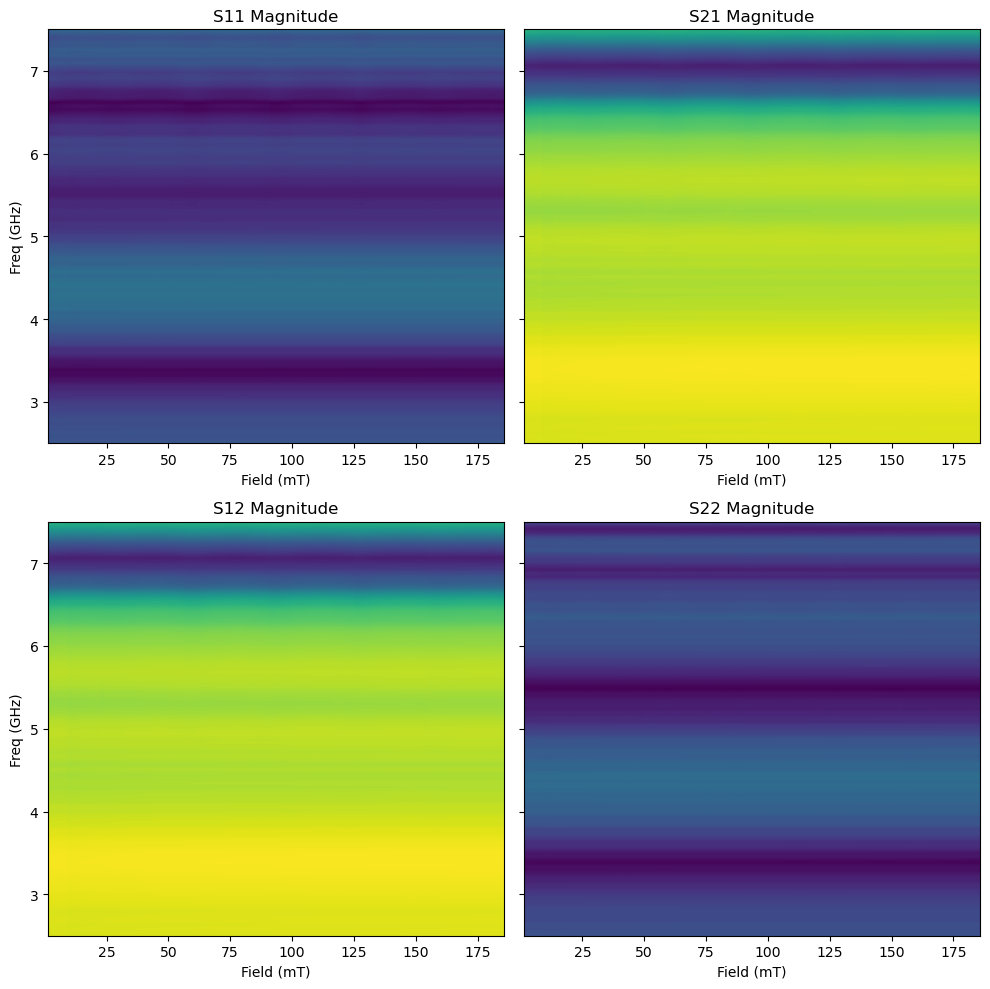

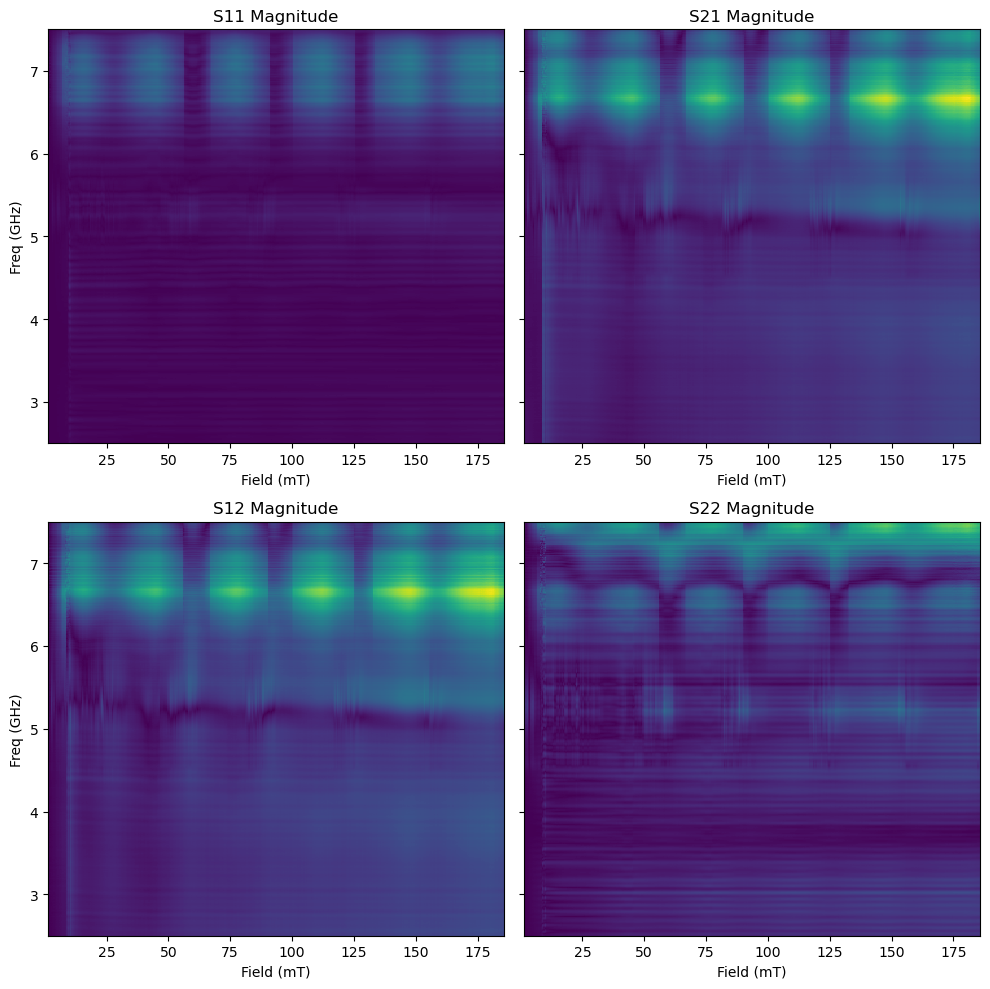

In [57]:
s_param_plot(os.path.join("HRRPY180","HRRPY180"))
s_param_plot(os.path.join("HRRPY180","HRRPY180"),norm=True)

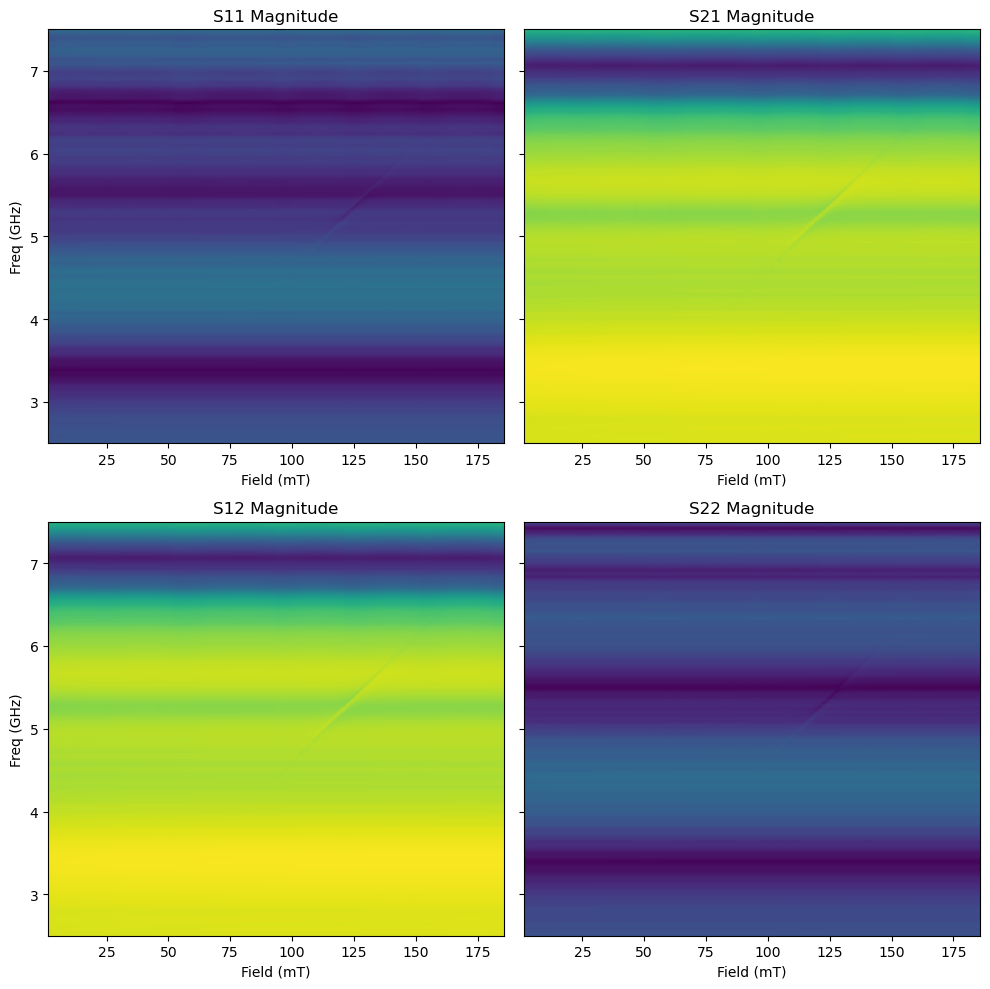

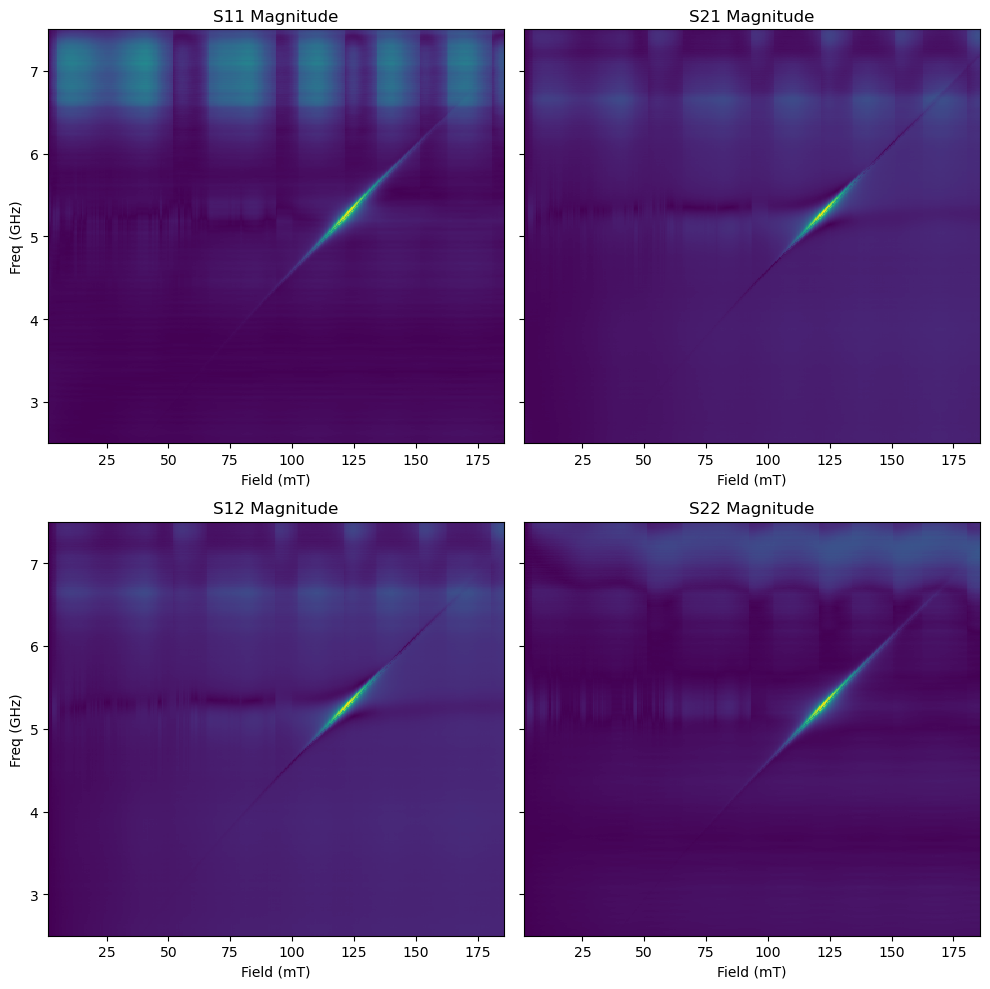

In [59]:
s_param_plot(os.path.join("HRRPY180","HRRYIG_BJ_PY"))
s_param_plot(os.path.join("HRRPY180","HRRYIG_BJ_PY"),norm=True)